In [1]:
#librerias requeridas para trabajar con grafos
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import powerlaw

In [3]:
#se importa el archivo de la red
df  = pd.read_csv("C:\\Users\\santi\\Desktop\\Ciencia de redes\\Redes Tarea 1\\rec-dating\\rec-dating2.edges"," ")
#Se crea el grafo a partir del archivo de texto
G = nx.from_pandas_edgelist(df,source="n",target = "t")
df.head()

,n,t,w
0,2,2,6
1,2,3,10
2,2,4,7
3,2,5,10
4,2,6,7


# Distribución de grado y ajuste con ley de potencia

In [6]:
#Función para calcular la distribución de grado de un grafo
def deg_dist(g,normalized=True):
    deg_y = nx.degree_histogram(g)
    deg_x = np.arange(0,len(deg_y)).tolist()
    nodes = g.number_of_nodes()
    if normalized:
        for i in range(len(deg_y)):
            deg_y[i]=deg_y[i]/nodes
    return deg_x,deg_y

#Función para hacer plot de Pk
def plot_dist(deg_x,deg_y):
    plt.xlabel('k')
    plt.ylabel('Pk')
    plt.plot(deg_x, deg_y)
    
#Función para hacer plot de Pk en escala logarítmica
def plot_dist_log(deg_x,deg_y):
    plt.xlabel('k\n(log scale)')
    plt.ylabel('Pk\n(log scale)')
    plt.xscale("log")
    plt.yscale("log")
    plt.plot(deg_x, deg_y)

La distribución de grado del grafo es:

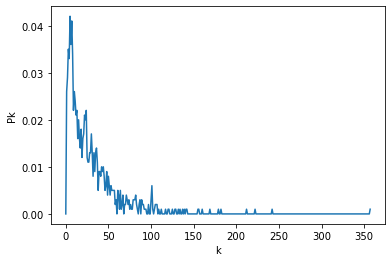

In [7]:
deg_x,deg_y = deg_dist(G)
plot_dist(deg_x,deg_y)

En escala logarítmica la distribución de grado es:

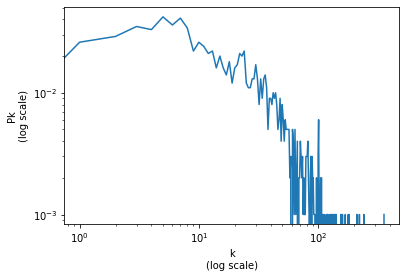

In [8]:
plot_dist_log(deg_x,deg_y)

Haciendole un ajuste con una Ley de potencia:

c:\users\santi\appdata\local\programs\python\python38-32\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
c:\users\santi\appdata\local\programs\python\python38-32\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


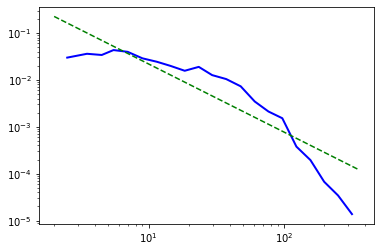

In [9]:
#Se obtiene la secuencia de grados por nodo
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
#Se hace un fit de acuerdo con una ley de potencia
fit = powerlaw.Fit(degree_sequence,xmin=2)
#Se grafica el fit 
fig = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig)

# Cálculo de caminos

In [10]:
#matriz adyacencia
A= nx.to_pandas_adjacency(G)
#Transpuesta mátriz
AT=np.transpose(A)
#si es simetrica es no direccionada
tmp=1
if(np.all(A == AT)):
    print("No Direccionada")
    tmp=2
else: 
    print("Direccionada")
print("\nNodos totales: ",len(A))
print("\nConexiones: ",len(df))
#A^2 para los caminos de largo dos
A2=np.sum(np.dot(A,A))/tmp
#en la diagonal de la matriz está el numero de ciclos de 
#la longitud que se desea, como se quiere triangulos
#es necesario onbtener la traza de la matriz A^3
print("\nLos ciclos de 3 (triangulos) son:",np.trace(np.dot(A2,A)))


No Direccionada

Nodos totales:  999

Conexiones:  14649

Los ciclos de 3 (triangulos) son: 8383207.5


# Calculo de Centralidades
## Centralidad de grado

In [11]:
#Se calcula la centralidad de grado de cada nodo
deg = nx.degree_centrality(G)
#Se crea un arreglo vacio para almacenar las centralidades
deg_list = np.zeros(G.number_of_nodes()+1)
#se llena el arreglo con los grados
for i in range(2,G.number_of_nodes()+1):
    deg_list[i]=deg[i]

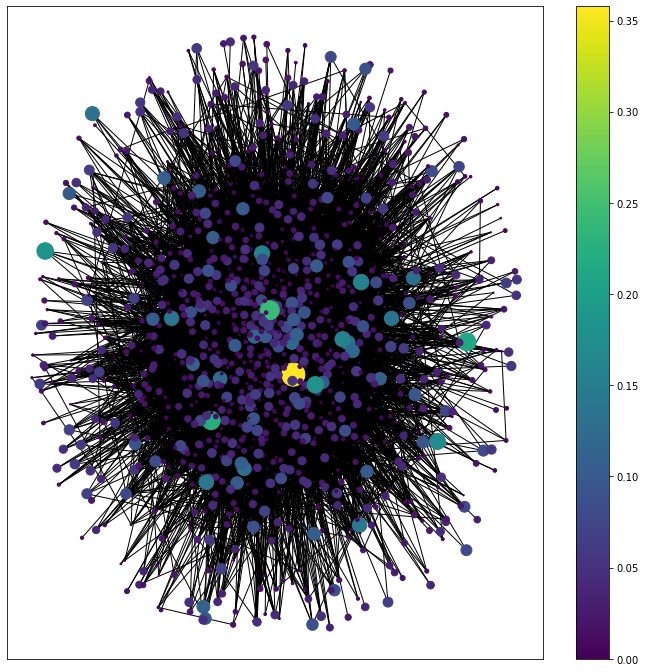

In [12]:
#Se grafica centalidad de grado
pos = nx.spring_layout(G, k=0.5, iterations=50)
plt.figure(3,figsize=(12,12))
nx.draw_networkx_nodes(G,pos,node_size=deg_list[1:len(G)+1]*1500,node_color = list(deg_list[1:len(G)+1]))
nx.draw_networkx_edges(G, pos)
vmin = min(deg_list[1:len(G)])
vmax = max(deg_list[1:len(G)])
sm = mpl.cm.ScalarMappable(norm=plt.Normalize(vmin,vmax))
sm._A=[]
plt.colorbar(sm)

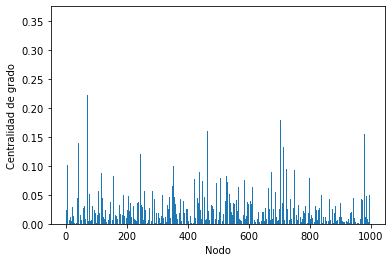

In [18]:
#Histograma de centralidad de grado
plt.bar(range(len(deg)), list(deg.values()), align='center')
plt.xlabel('Nodo')
plt.ylabel('Centralidad de grado')
plt.show()

## Eigencentralidad

In [14]:
#Se calcula la centralidad de grado de cada nodo
deg_eig = nx.eigenvector_centrality(G)
#Se crea un arreglo vacio para almacenar las centralidades
deg_list_eig = np.zeros(G.number_of_nodes()+1)
#se llena el arreglo con los grados
for i in range(2,G.number_of_nodes()+1):
    deg_list_eig[i]=deg_eig[i]

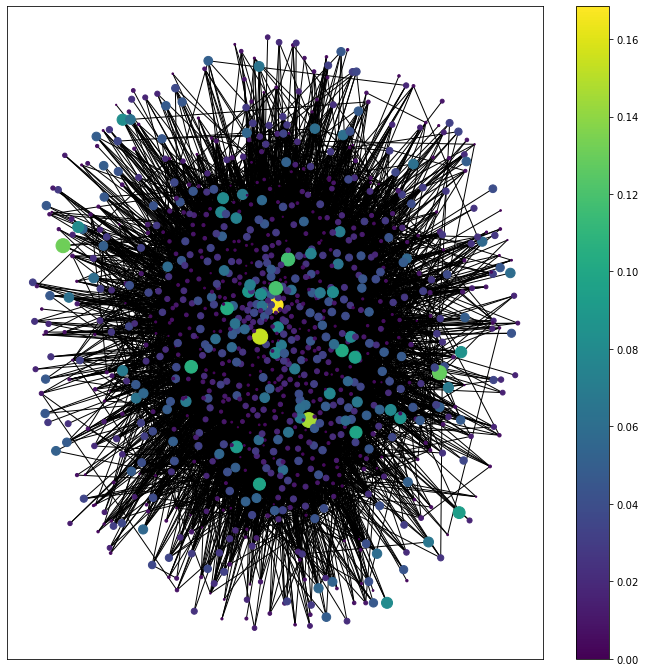

In [16]:
#Se grafica centalidad de grado
pos = nx.spring_layout(G, k=0.5, iterations=50)
plt.figure(3,figsize=(12,12))
nx.draw_networkx_nodes(G,pos,node_size=deg_list_eig[1:len(G)+1]*1500,node_color = list(deg_list_eig[1:len(G)+1]))
nx.draw_networkx_edges(G, pos)
vmin = min(deg_list_eig[1:len(G)])
vmax = max(deg_list_eig[1:len(G)])
sm = mpl.cm.ScalarMappable(norm=plt.Normalize(vmin,vmax))
sm._A=[]
plt.colorbar(sm)

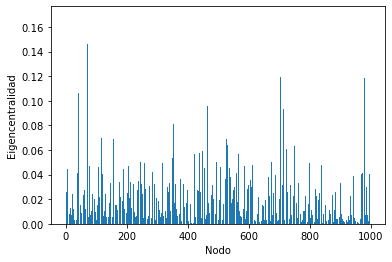

In [20]:
#Histograma de centralidad de grado
plt.bar(range(len(deg_eig)), list(deg_eig.values()), align='center')
plt.xlabel('Nodo')
plt.ylabel('Eigencentralidad')
plt.show()